<a href="https://colab.research.google.com/github/BbangB/Code/blob/main/DNN_CIFAR_10_Categorical_Classification_GPU.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CIFAR 10 - Categorical Classification

In [71]:
import warnings
warnings.filterwarnings('ignore')

# I. CIFAR 10 Data_Set Load & Review

> ## 1) Load CIFAR 10 Data_Set

In [72]:
from tensorflow.keras.datasets import cifar10

(X_train, y_train), (X_test, y_test) = cifar10.load_data()

* Train_Data Information

In [73]:
print(len(X_train))
print(X_train.shape)

print(len(y_train))
print(y_train[0:5])

50000
(50000, 32, 32, 3)
50000
[[6]
 [9]
 [9]
 [4]
 [1]]


* Test_Data Information

In [74]:
print(len(X_test))
print(X_test.shape)

print(len(y_test))
print(y_test[0:5])

10000
(10000, 32, 32, 3)
10000
[[3]
 [8]
 [8]
 [0]
 [6]]


> ## 2) Visualization

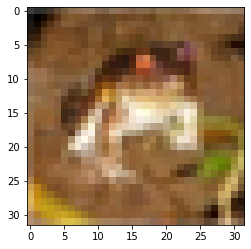

In [75]:
import matplotlib.pyplot as plt

digit = X_train[0]
plt.imshow(digit)
plt.show()

In [82]:
import numpy as np
np.set_printoptions(linewidth = 150)

print(X_train[0][0])


[[ 59  62  63]
 [ 43  46  45]
 [ 50  48  43]
 [ 68  54  42]
 [ 98  73  52]
 [119  91  63]
 [139 107  75]
 [145 110  80]
 [149 117  89]
 [149 120  93]
 [131 103  77]
 [125  99  76]
 [142 115  91]
 [144 112  86]
 [137 105  79]
 [129  97  71]
 [137 106  79]
 [134 106  76]
 [124  97  64]
 [139 113  78]
 [139 112  75]
 [133 105  69]
 [136 105  74]
 [139 108  77]
 [152 120  89]
 [163 131 100]
 [168 136 108]
 [159 129 102]
 [158 130 104]
 [158 132 108]
 [152 125 102]
 [148 124 103]]


# II. Data Preprocessing

> ## 1) Reshape and Normalization

* reshape
 * (50000, 32, 32, 3) to (50000, 3072)

In [83]:
X_train = X_train.reshape(50000,32*32*3)
X_test = X_test.reshape(10000,32*32*3)

X_train.shape, X_test.shape

((50000, 3072), (10000, 3072))

* Normalization

In [84]:
X_train = X_train.astype(float) / 309
X_test = X_test.astype(float)/309

In [85]:
print(X_train[0])

[0.190938511 0.200647249 0.203883495 ... 0.398058252 0.297734628 0.233009709]


> ## 2) One Hot Encoding

In [86]:
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)


In [87]:
print(y_train[:5])

[[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]


# III. Keras Modeling

> ## 1) Model Define

* 모델 신경망 구조 정의
 - 2개의 Hidden Layers & 3968개의 Nodes

In [124]:
from tensorflow.keras import models
from tensorflow.keras import layers
from keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras import regularizers

cifar_ = models.Sequential()
cifar_.add(layers.Dense(1024, activation= 'relu',
                        kernel_regularizer= regularizers.l2(0.0001),
                        input_shape = (3072,)))
cifar_.add(Dropout(0.25))
cifar_.add(BatchNormalization())
cifar_.add(layers.Dense(512, activation= 'relu',
                        kernel_regularizer= regularizers.l2(0.0001)))
cifar_.add(Dropout(0.25))
cifar_.add(BatchNormalization())
cifar_.add(layers.Dense(256, activation= 'relu',
                        kernel_regularizer= regularizers.l2(0.0001)))
cifar_.add(Dropout(0.5))
cifar_.add(BatchNormalization())
cifar_.add(layers.Dense(10, activation = 'sigmoid'))

* 모델 구조 확인

In [125]:
cifar_.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_33 (Dense)             (None, 1024)              3146752   
_________________________________________________________________
dropout_23 (Dropout)         (None, 1024)              0         
_________________________________________________________________
batch_normalization_23 (Batc (None, 1024)              4096      
_________________________________________________________________
dense_34 (Dense)             (None, 512)               524800    
_________________________________________________________________
dropout_24 (Dropout)         (None, 512)               0         
_________________________________________________________________
batch_normalization_24 (Batc (None, 512)               2048      
_________________________________________________________________
dense_35 (Dense)             (None, 256)             

> ## 2) Model Compile

* 모델 학습방법 설정

In [126]:
cifar_.compile(loss = 'categorical_crossentropy',
               optimizer = 'adam',
               metrics = ['accuracy'])

> ## 3) Model Fit

* 약 5분

In [127]:
%%time

T_cifar = cifar_.fit(X_train, y_train,
                     epochs=100,
                     batch_size = 128,
                     validation_split = 0.2)


Epoch 1/100
313/313 [==============================] - 5s 11ms/step - loss: 2.3869 - accuracy: 0.2679 - val_loss: 2.2253 - val_accuracy: 0.2942
Epoch 2/100
313/313 [==============================] - 3s 9ms/step - loss: 2.0532 - accuracy: 0.3442 - val_loss: 2.2099 - val_accuracy: 0.2629
Epoch 3/100
313/313 [==============================] - 3s 10ms/step - loss: 1.9607 - accuracy: 0.3697 - val_loss: 2.0807 - val_accuracy: 0.3173
Epoch 4/100
313/313 [==============================] - 3s 9ms/step - loss: 1.9173 - accuracy: 0.3790 - val_loss: 1.8975 - val_accuracy: 0.3879
Epoch 5/100
313/313 [==============================] - 3s 9ms/step - loss: 1.8983 - accuracy: 0.3778 - val_loss: 1.8829 - val_accuracy: 0.3715
Epoch 6/100
313/313 [==============================] - 3s 9ms/step - loss: 1.8629 - accuracy: 0.3818 - val_loss: 1.8003 - val_accuracy: 0.3964
Epoch 7/100
313/313 [==============================] - 3s 9ms/step - loss: 1.8355 - accuracy: 0.3863 - val_loss: 1.8155 - val_accuracy: 0.39

> ## 4) 학습 결과 시각화

* Loss Visualization

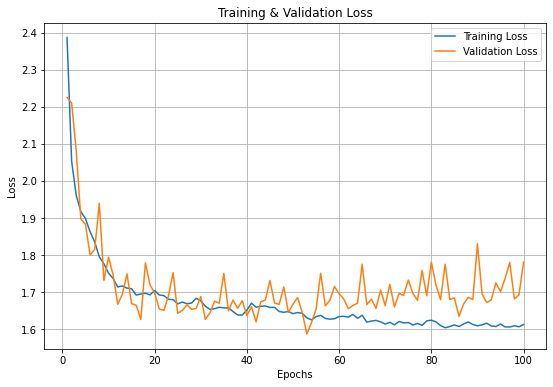

In [128]:
import matplotlib.pyplot as plt

epochs = range(1, len(T_cifar.history['loss']) + 1)

plt.figure(figsize = (9, 6))
plt.plot(epochs, T_cifar.history['loss'])
plt.plot(epochs, T_cifar.history['val_loss'])
# plt.ylim(0, 0.25)
plt.title('Training & Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Training Loss', 'Validation Loss'])
plt.grid()
plt.show()

> ## 5) Model Evaluate

* Loss & Accuracy

In [129]:
loss, accuracy = cifar_.evaluate(X_test, y_test)

print('Loss = {:.5f}'.format(loss))
print('Accuracy = {:.5f}'.format(accuracy))

313/313 [==============================] - 1s 4ms/step - loss: 1.7632 - accuracy: 0.4054
Loss = 1.76318
Accuracy = 0.40540


> ## 6) Model Predict

* Probability

In [142]:
np.set_printoptions(suppress = True, precision = 9)

print(cifar_.predict(X_test[:1,:]))

[[0.25408378 0.2408979  0.50055593 0.8277399  0.5852484  0.8182651  0.67480874 0.45956433 0.5185898  0.23671214]]


* Class

In [131]:
print(np.argmax(cifar_.predict(X_test[:1,:]), axis = 1))

[3]


# 
# 
# 
# The End
# 
# 
# 